Exploratory Data Analysis of imdb top 100 movies data set

This tabular dataset consists of listings of top 1000 movies in IMDB with data about released year, genre, IMDB rating,etc

In [1]:
import pandas as pd

top_1000_movies = pd.read_csv("imdb_top_1000.csv")

top_1000_movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"



1. Checking for the null values within each columns
2. Droping the rows containing the missing values

In [2]:
# number of null values in each column

print(top_1000_movies.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [3]:
# dropping rows with null values

top_1000_movies = top_1000_movies.dropna()

print(top_1000_movies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    714 non-null    object 
 1   Series_Title   714 non-null    object 
 2   Released_Year  714 non-null    object 
 3   Certificate    714 non-null    object 
 4   Runtime        714 non-null    object 
 5   Genre          714 non-null    object 
 6   IMDB_Rating    714 non-null    float64
 7   Overview       714 non-null    object 
 8   Meta_score     714 non-null    float64
 9   Director       714 non-null    object 
 10  Star1          714 non-null    object 
 11  Star2          714 non-null    object 
 12  Star3          714 non-null    object 
 13  Star4          714 non-null    object 
 14  No_of_Votes    714 non-null    int64  
 15  Gross          714 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 94.8+ KB
None


Creating a histogram for all the movies accordingly to their released years.

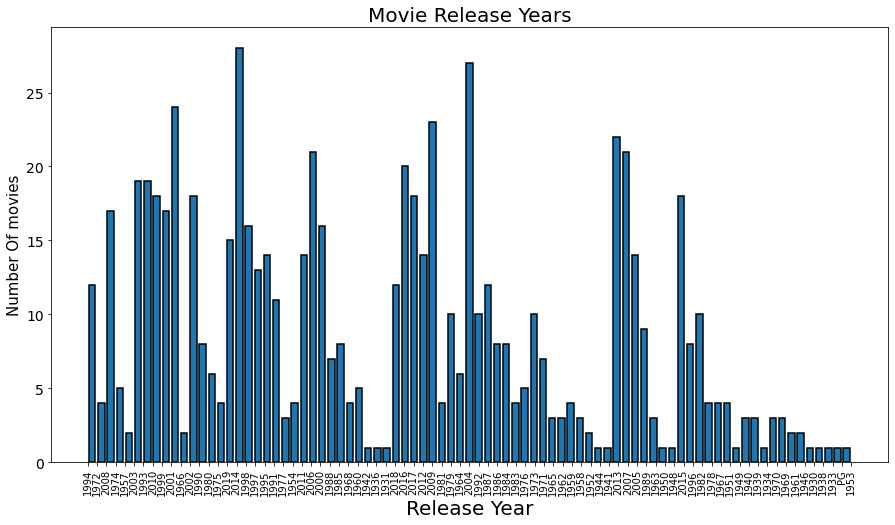

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))

num_bins = top_1000_movies['Released_Year'].nunique()

plt.hist(top_1000_movies['Released_Year'], bins=num_bins, edgecolor='black', linewidth=1.5, rwidth=0.7)

plt.xticks(rotation=90)

plt.title("Movie Release Years", fontsize=20)

plt.ylabel("Number Of movies", fontsize=15)

plt.yticks(fontsize=14)

plt.xlabel("Release Year", fontsize=20)

plt.show()


1. Ploting the average rating by genre
2. Ploting the average metascore by genre

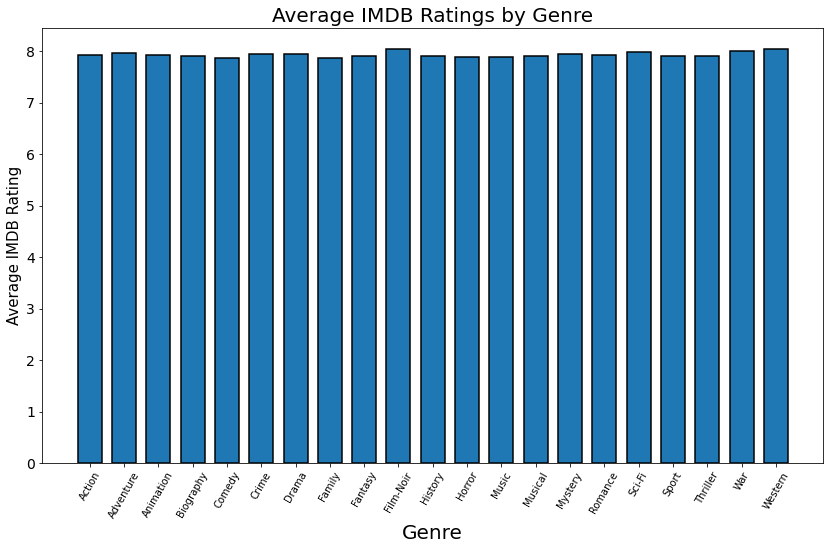

In [5]:
import matplotlib.pyplot as plt


average_ratings = top_1000_movies.assign(Genre=top_1000_movies['Genre'].str.split(', ')).explode('Genre')

average_ratings = average_ratings.groupby("Genre")["IMDB_Rating"].mean()

plt.figure(figsize=(14,8))

plt.bar(average_ratings.index, average_ratings.values, edgecolor='black', linewidth=1.5, width=0.7)

plt.xticks(rotation=60)
plt.title("Average IMDB Ratings by Genre", fontsize=20)
plt.ylabel("Average IMDB Rating", fontsize=15)
plt.xlabel("Genre", fontsize=20)

plt.yticks(fontsize=14)
plt.show()


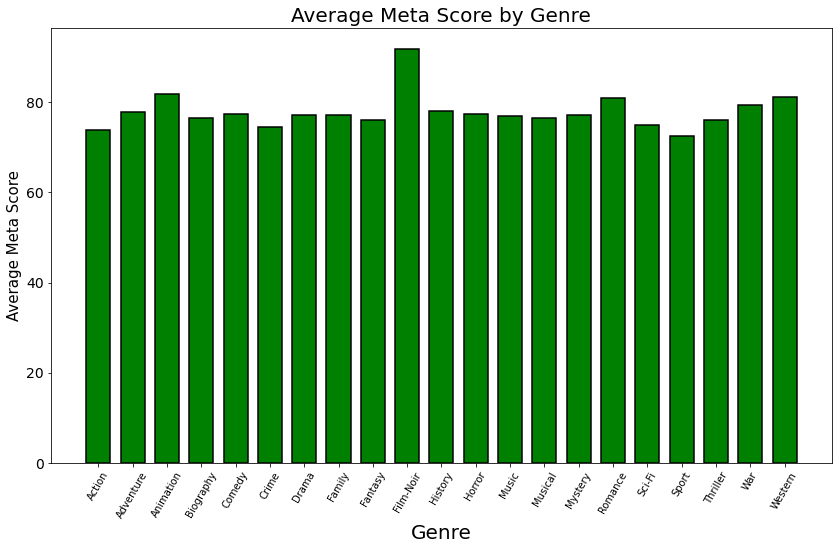

In [6]:
import matplotlib.pyplot as plt

average_meta = top_1000_movies.assign(Genre=top_1000_movies['Genre'].str.split(', ')).explode('Genre')

average_meta = average_meta.groupby("Genre")["Meta_score"].mean()

plt.figure(figsize=(14,8))

plt.bar(average_meta.index, average_meta.values,color="green", edgecolor='black', linewidth=1.5, width=0.7)

plt.xticks(rotation=60)
plt.title("Average Meta Score by Genre", fontsize=20)
plt.ylabel("Average Meta Score", fontsize=15)
plt.xlabel("Genre", fontsize=20)

plt.yticks(fontsize=14)
plt.show()



Ploting a bar graph of the 10 movies with the least number of votes.

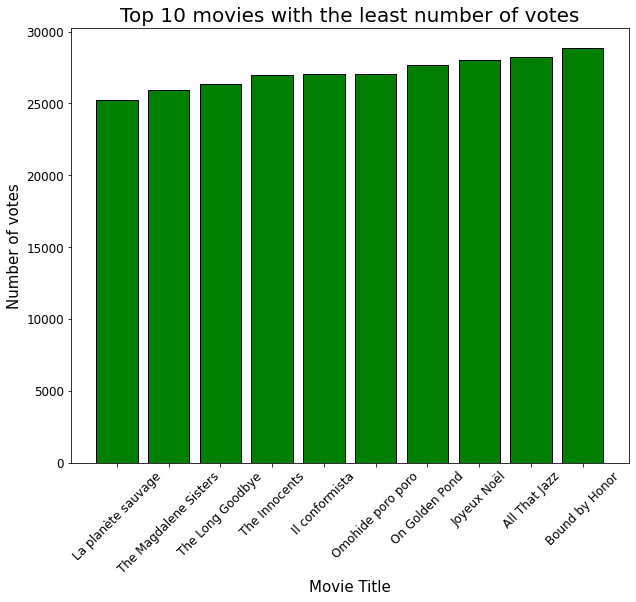

In [7]:
votes = top_1000_movies.sort_values(by="No_of_Votes", ascending=True).head(10)


plt.figure(figsize=(10,8))

plt.bar(votes["Series_Title"], votes["No_of_Votes"], color='green', edgecolor="black", width=0.8)

plt.title("Top 10 movies with the least number of votes", fontsize=20)

plt.xlabel("Movie Title", fontsize=15)

plt.ylabel("Number of votes", fontsize=15)

plt.xticks(rotation=45, fontsize=12)

plt.yticks(fontsize=12)

plt.show()


Ploting a bar graph of the top 10 directors with the highest number of movies.

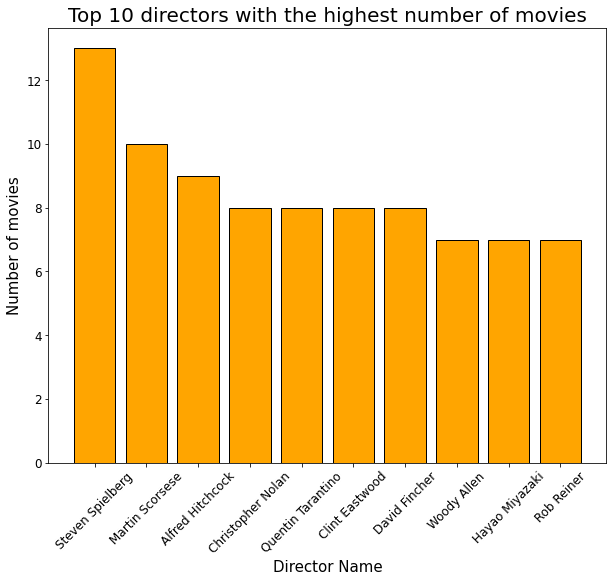

In [8]:
directors = top_1000_movies['Director'].value_counts().head(10)

plt.figure(figsize=(10,8))

plt.bar(directors.index, directors.values, color='orange', edgecolor="black", width=0.8)

plt.title("Top 10 directors with the highest number of movies", fontsize=20)

plt.xlabel("Director Name", fontsize=15)

plt.ylabel("Number of movies", fontsize=15)

plt.xticks(rotation=45, fontsize=12)

plt.yticks(fontsize=12)

plt.show()



1. Displaying count of each IMDB ratings
2. Displaying count of each genre

In [9]:
ratings = top_1000_movies["IMDB_Rating"].value_counts()

print("The Counts for each IMDB rating in the dataset:")

print("Rating Count")
print(ratings)

The Counts for each IMDB rating in the dataset:
Rating Count
7.7    121
7.6    107
7.8    107
8.0     97
7.9     77
8.1     72
8.3     33
8.2     32
8.4     20
8.5     19
8.6     11
8.7      5
8.8      5
8.9      3
9.0      3
9.3      1
9.2      1
Name: IMDB_Rating, dtype: int64


In [10]:
ratings = top_1000_movies["Genre"].str.split(", ").explode().value_counts()

print("The Counts for each Genre in the dataset:")

print("Genre      Count")

print(ratings)




The Counts for each Genre in the dataset:
Genre      Count
Drama        500
Adventure    163
Comedy       161
Crime        142
Action       140
Thriller      99
Romance       88
Biography     88
Mystery       70
Animation     63
Sci-Fi        56
Fantasy       55
Family        43
History       38
War           29
Music         27
Horror        18
Sport         17
Western       16
Musical       11
Film-Noir      6
Name: Genre, dtype: int64



displaying top 50 movies titles according to their IMDB ratings

In [11]:
rating = top_1000_movies.sort_values(by="IMDB_Rating", ascending=False).head(50)

print("Top 50 movies according to their IMDB Rating")

for index, row in rating.iterrows():
    print(f"Movie Title: {row['Series_Title']}, IMDB Rating: {row['IMDB_Rating']}")

Top 50 movies according to their IMDB Rating
Movie Title: The Shawshank Redemption, IMDB Rating: 9.3
Movie Title: The Godfather, IMDB Rating: 9.2
Movie Title: The Dark Knight, IMDB Rating: 9.0
Movie Title: The Godfather: Part II, IMDB Rating: 9.0
Movie Title: 12 Angry Men, IMDB Rating: 9.0
Movie Title: The Lord of the Rings: The Return of the King, IMDB Rating: 8.9
Movie Title: Pulp Fiction, IMDB Rating: 8.9
Movie Title: Schindler's List, IMDB Rating: 8.9
Movie Title: The Lord of the Rings: The Fellowship of the Ring, IMDB Rating: 8.8
Movie Title: Il buono, il brutto, il cattivo, IMDB Rating: 8.8
Movie Title: Forrest Gump, IMDB Rating: 8.8
Movie Title: Fight Club, IMDB Rating: 8.8
Movie Title: Inception, IMDB Rating: 8.8
Movie Title: The Lord of the Rings: The Two Towers, IMDB Rating: 8.7
Movie Title: The Matrix, IMDB Rating: 8.7
Movie Title: Goodfellas, IMDB Rating: 8.7
Movie Title: Star Wars: Episode V - The Empire Strikes Back, IMDB Rating: 8.7
Movie Title: One Flew Over the Cuckoo'


Ploting a histogram for distribution of movies runtime

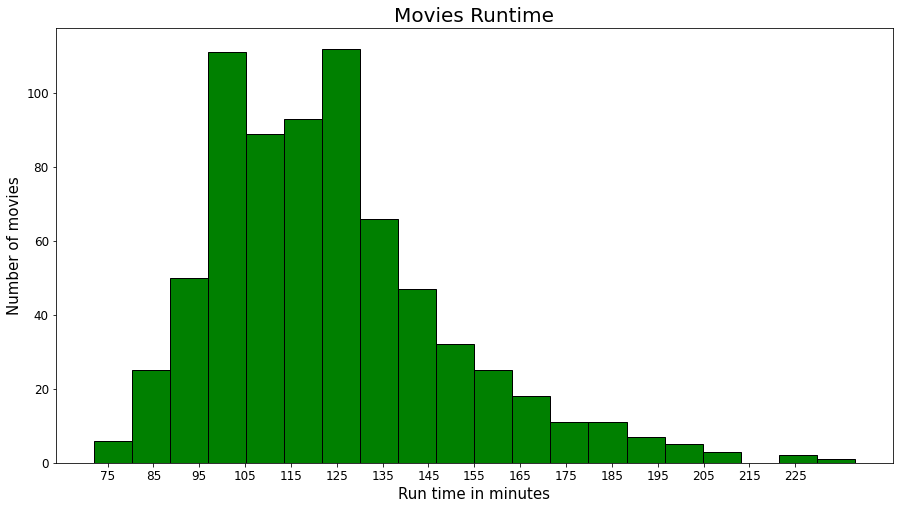

In [12]:
runtime = top_1000_movies['Runtime'].astype(str)

runtime_cleaned = runtime.str.extract('(\d+)').astype(int)

plt.figure(figsize=(15,8))

plt.hist(runtime_cleaned, color='green',bins=20, edgecolor="black")

plt.title("Movies Runtime", fontsize=20)

plt.xlabel("Run time in minutes", fontsize=15)

plt.ylabel("Number of movies", fontsize=15)

plt.xticks(ticks=range(75, 230, 10), fontsize=12)

plt.yticks(fontsize=12)

plt.show()


Analyzing IMDB Ratings by Movie Certificate Using a Box Plot

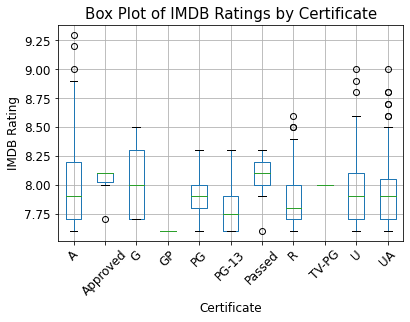

In [13]:
cert = top_1000_movies

cert['Certificate'] = cert['Certificate'].replace({'U/A': 'UA'})


cert.boxplot(column='IMDB_Rating', by='Certificate')

plt.title('Box Plot of IMDB Ratings by Certificate', fontsize=15)
plt.suptitle('')  
plt.ylabel('IMDB Rating',fontsize=12)
plt.xlabel('Certificate', fontsize=12)

plt.xticks(rotation=45, fontsize=12)

plt.yticks(fontsize=12)
plt.show()

Printing the First Row Based on the Longest Duration Time of a Movie from Each released_year Column and also diplay the director, all the stars, runtime and series title

In [14]:

runtime = top_1000_movies

runtime['Runtime'] = top_1000_movies['Runtime'].astype(str)

runtime_cleaned = runtime['Runtime'].str.extract('(\d+)').astype(int)

runtime['Runtime'] = runtime_cleaned

longest_duration = runtime.loc[runtime.groupby("Released_Year")["Runtime"].idxmax()]

print("The longest Duration Time of a Movie for each release year:")

result = longest_duration[['Released_Year', 'Director', 'Star1' , 'Star2' , 'Star3', 'Star4' , 'Runtime', 'Series_Title']]

for index, row in result.iterrows():
    print(f"Release Year: {row['Released_Year']}, Director: {row['Director']}, Stars: {row['Star1']}, {row['Star2']}, {row['Star3']}, {row['Star4']}, "
          f"Runtime: {row['Runtime']} minutes, Title: {row['Series_Title']}")


The longest Duration Time of a Movie for each release year:
Release Year: 1930, Director: Lewis Milestone, Stars: Lew Ayres, Louis Wolheim, John Wray, Arnold Lucy, Runtime: 152 minutes, Title: All Quiet on the Western Front
Release Year: 1931, Director: Charles Chaplin, Stars: Charles Chaplin, Virginia Cherrill, Florence Lee, Harry Myers, Runtime: 87 minutes, Title: City Lights
Release Year: 1933, Director: Merian C. Cooper, Stars: Ernest B. Schoedsack, Fay Wray, Robert Armstrong, Bruce Cabot, Runtime: 100 minutes, Title: King Kong
Release Year: 1934, Director: Frank Capra, Stars: Clark Gable, Claudette Colbert, Walter Connolly, Roscoe Karns, Runtime: 105 minutes, Title: It Happened One Night
Release Year: 1936, Director: Charles Chaplin, Stars: Charles Chaplin, Paulette Goddard, Henry Bergman, Tiny Sandford, Runtime: 87 minutes, Title: Modern Times
Release Year: 1938, Director: Michael Curtiz, Stars: William Keighley, Errol Flynn, Olivia de Havilland, Basil Rathbone, Runtime: 102 minu

In [15]:
print("Movie which has the longest run time:")

longest_duration = runtime.loc[runtime["Runtime"].idxmax()]

result = longest_duration[['Released_Year', 'Director', 'Star1' , 'Star2' , 'Star3', 'Star4' , 'Runtime', 'Series_Title']]

print(result)



Movie which has the longest run time:
Released_Year                  1939
Director             Victor Fleming
Star1                  George Cukor
Star2                      Sam Wood
Star3                   Clark Gable
Star4                  Vivien Leigh
Runtime                         238
Series_Title     Gone with the Wind
Name: 314, dtype: object


Analyzing the distribution of IMDb ratings across different genres. Identify which genre tends to have higher ratings and provide a possible explanation for this trend based on the characteristics of the genres and the audience they attract.

In [16]:
ratings = top_1000_movies.assign(Genre=top_1000_movies['Genre'].str.split(', ')).explode('Genre')

average_ratings = ratings.groupby("Genre")["IMDB_Rating"].mean()

print("Average IMDB ratings of all Genres:")

print(average_ratings)

top_genres = average_ratings.sort_values(ascending=False).head(3)


Average IMDB ratings of all Genres:
Genre
Action       7.937143
Adventure    7.963190
Animation    7.926984
Biography    7.909091
Comedy       7.873292
Crime        7.942958
Drama        7.941400
Family       7.876744
Fantasy      7.901818
Film-Noir    8.050000
History      7.910526
Horror       7.900000
Music        7.896296
Musical      7.918182
Mystery      7.947143
Romance      7.925000
Sci-Fi       7.991071
Sport        7.917647
Thriller     7.915152
War          8.006897
Western      8.037500
Name: IMDB_Rating, dtype: float64


In [17]:
print("The average ratings of Top 3 highest rated Genres:")

print(top_genres)

The average ratings of Top 3 highest rated Genres:
Genre
Film-Noir    8.050000
Western      8.037500
War          8.006897
Name: IMDB_Rating, dtype: float64


### Explation regarding why some Genres have higher Ratings:

1) Film-Noir (Average IMDB Rating of 8.05): This Genre mostly includes "dark films" which have dark themes. These films often include characters that are not clearly good or bad. The mood of these films is usually very gloomy, making it seem like bad things might happen. The stories of these films moslty revolve around crime. They often involve illegal activities. 

Film-Noir movies are rated highly because these movies often attract people that like stories with  mystery, crime, drama and like dark themes. These movies often attracts people who think very deeply. These films are great for people that like serious themes, characters that are flawed and are not clearly good or bad. The success of these films lead to the devolopment of the independent film history.

2) Western (Average IMDB Rating of 8.03): The Western Genre in movies and TV shows tell stories about American Old West, mostly in the 1800s. These stories deals with life in wild places and deals with fight between good and bad and tough and independent. These movies and TV shows usually show some well known elements like cowboys, gun battles, and the wild lands of the American west. This Genre became very popular in the early 1900s.

Western Genre still remains very popular to this date because it shows the American Old West as a place where people need a lot of strength and bravery to survive. This makes all the stories seem very exciting, focusing on the ideas of being independent and strong. These movies tends to have themes like justice, revenge, bravery which are well-liked by people of all age groups. 
All The above reasons are why this Genre is so highly rated. It tends to attarct people who like action, adventure and justice, reminding  people of the American Old Wild West.

3) War (Average IMDB Rating of 8): War Genre movies show the events that happen during an actual war, these movies are often based on real wars or battles that have occured in the past. They focus more on the feelings, scrifices and hard times that soldiers and regular people go through during war. These movies often show how war affects people and society.

War movies are quite popular because they tell stories about history and connect with people. They show both beavery and sadness of the war, and how it brings out the best and worst in people. War movies are high rated because they attract people who like historical stories and want to learn about the past.

Exploring the relationship between the runtime of a movie and its IMDb rating. Are longer movies generally rated higher? Use statistical methods to justify your answer and consider any potential biases in the dataset.

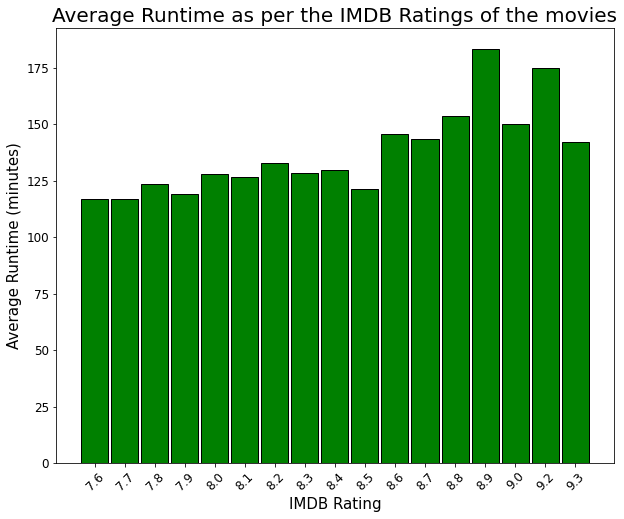

In [18]:
runtime = top_1000_movies

extract_runtime = top_1000_movies['Runtime'].astype(str)

runtime_cleaned = extract_runtime.str.extract('(\d+)').astype(int)


runtime['Runtime'] = runtime_cleaned

average_imdb_rating = runtime.groupby('IMDB_Rating')['Runtime'].mean()


plt.figure(figsize=(10,8))

plt.bar(average_imdb_rating.index.astype(str), average_imdb_rating.values, color='green', edgecolor="black", width=0.9)

plt.title("Average Runtime as per the IMDB Ratings of the movies", fontsize=20)

plt.xlabel("IMDB Rating", fontsize=15)

plt.ylabel("Average Runtime (minutes)", fontsize=15)

plt.xticks(rotation=45, fontsize=12)

plt.yticks(fontsize=12)

plt.show()

As per the above graph we can say that movies with longer runtimes generally seem to have higher IMDB Rating, but this relationship is not very consistent because some higher ratings have average runtime of over 150 minutes but some other higher ratigs like 9.0, 9.3 have an average runtime of less than 150 minutes.  

### Statistical method: Pearson Correlation Analysis

In [19]:
import pandas as pd
from scipy.stats import pearsonr

correlation, p_value = pearsonr(average_imdb_rating.index, average_imdb_rating.values)

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


Pearson correlation coefficient: 0.7982062112741828
P-value: 0.00012275725265065967


Here we have used Pearson Correlation Analysis to see if movies with longer runtimes have higher IMDB Rating. The result shows strong postive correlation of 0.7982062112741828. This value generally means that as the movies runtime increases, the IMDB Ratings tends to increase too. In the output the p-value is 0.000122757, this value confirms that the result is not due to chance. This result suggests that in general, longer movies have more IMDB Rating. We have to also consider potential biases like different movie genres or older movies, which could affect the results. 

